In [29]:
import os
import fnmatch

#find the no of files in each folder 
def filecount(dir_path):
    co= len(fnmatch.filter(os.listdir(dir_path), '*.*'))
    print(co)
    return co

dir1=r"C:\Users\hp\Machine Learning\Retail_product position\product_images"
count_train=filecount(dir1)

dir2=r"C:\Users\hp\Machine Learning\Retail_product position\shelf_images"
count_test=filecount(dir2)

300
3153


In [30]:
import cv2
from os import listdir
import numpy as np

In [31]:
#check the image is corrupted or not 
def is_image_corrupted(f_path):
    c, nc = [], []
    for name in listdir(f_path):
        file_path = os.path.join(f_path, name)
        try:
            with Image.open(file_path) as img:
                img.verify()
                c.append(file_path)
                #print(file_path, " not corrupted")
        except:
            nc.append(file_path)
            #print(file_path, " corrupted")
    return c, nc
c1,nc1=is_image_corrupted(dir1)
c2,nc2=is_image_corrupted(dir2)

In [32]:
print(len(c1))
print(len(nc1))
print(len(c2))
print(len(nc2))

300
0
3153
0


object detection 

In [33]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image,ImageEnhance
import requests


In [34]:
from natsort import natsorted

In [35]:
from PIL import Image
from skimage import filters
import numpy as np 
import cv2 
import matplotlib.pyplot as plt


In [36]:
#bounding box detction using Hugging face 
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
a=[]
b=[]
wi=[]
hi=[]
ct=0
for name in natsorted(listdir(dir1)):
        f = dir1 + '/' + name
        image = Image.open(f)
        #enhancer = ImageEnhance.Contrast(image)
        #factor = 1.25
        #image = enhancer.enhance(factor)
        #image = np.array(image)
        #image= filters.unsharp_mask(image, radius=0.002, amount=4)
        w,h= image.size
        id=(name.split('.')[0]).split('r')[1]
        inputs = processor(images=image, return_tensors="pt")
        outputs = model(**inputs)
        target_sizes = torch.tensor([image.size[::-1]])
        results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.4)[0]
        for box in results["boxes"]:
            box = [round(i, 2) for i in box.tolist()]
            if id not in a:
                a.append(id)
                b.append(box)
                wi.append(w)
                hi.append(h)
                
    

C:\Users\hp\anaconda3\lib\site-packages\transformers\models\detr\image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [36]:
'''a=[]
b=[]
for name in natsorted(os.listdir(dir1)):
    f = os.path.join(dir1, name)
    image = Image.open(f)
    
    #enhancer = ImageEnhance.Contrast(image)
    #factor = 0.85
    #image = enhancer.enhance(factor)
        
    image = np.array(image) # convert PIL image to numpy array
    image = filters.unsharp_mask(image, radius=0.002, amount=4) # apply unsharp mask filter for sharpening
    
    id = (name.split('.')[0]).split('r')[1]
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.shape[:2][::-1]]) # reverse order of dimensions
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.4)[0]
    for box in results["boxes"]:
        box = [round(i, 2) for i in box.tolist()]
        if id not in a:
            a.append(id)
            b.append(box)'''

C:\Users\hp\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


In [37]:
an=[]
for i in a:
    an.append(int(i))

In [38]:
ni=[]
for i in range(0,300,1):
    if i not in an:
        ni.append(i)

In [39]:
print(len(an))

225


In [40]:
a1=0
a2=0
a3=0
c1,c2,c3=[],[],[]
for i in an:
    if(i%3==0):
        a1=a1+1
        c1.append(i)
    elif(i%3==1):
        a2=a2+1
        c2.append(i)
    else:
        a3=a3+1
        c3.append(i)
print(a1)
print(a2)
print(a3)

73
75
77


In [41]:
print(c3)

[2, 5, 8, 11, 14, 17, 23, 26, 29, 35, 38, 41, 44, 47, 50, 59, 62, 65, 68, 71, 77, 80, 83, 86, 89, 92, 98, 101, 104, 107, 110, 116, 119, 122, 125, 128, 131, 134, 137, 143, 146, 155, 158, 161, 167, 170, 173, 176, 179, 182, 188, 191, 194, 200, 203, 206, 212, 218, 221, 224, 230, 233, 236, 242, 245, 254, 257, 269, 272, 275, 278, 281, 284, 290, 293, 296, 299]


In [42]:
import pandas as pd
d1={'image_id':an,'box shape':b,'width_image':wi,'Height_image':hi }
df1=pd.DataFrame(d1)

In [43]:
df1[:5]

image_id                           box shape  width_image  Height_image
0         1     [999.13, 4.06, 1683.9, 1596.59]         2272          1704
1         2    [715.34, 4.57, 1465.34, 1570.18]         2272          1704
2         3   [1149.47, 3.94, 1705.58, 1527.15]         2272          1704
3         4   [804.9, 172.98, 1430.73, 1259.28]         2272          1704
4         5  [920.84, 218.96, 1525.31, 1289.45]         2272          1704

In [179]:
#df1['image_id']=df1['image_id'].astype(int)

In [44]:
id_list=df1['image_id'].values
print(len(id_list))

225


In [45]:
cl=0
for row_id,id in enumerate(id_list):
    if(id<=288):
        if ((id-1)!=0 and (id-1)%3==0):
            cl+=1
            df1.loc[row_id,'class'] = int(cl)
        else:
            df1.loc[row_id,'class'] = int(cl)
    else:
        if ((id-1)!=288 and (id-1)%2==0):
            cl+=1
            df1.loc[row_id,'class'] = int(cl)
        else:
            df1.loc[row_id,'class'] = int(cl)

In [21]:
print(len(df1['class']))

225


In [46]:
#out 101 product it detect only 75 
df1['class']=df1['class'].astype(int)
print(df1[-12:-1])

     image_id                            box shape  width_image  Height_image  \
213       288  [812.62, 1072.93, 1061.17, 1247.17]         2272          1704   
214       289     [-1.1, 320.52, 1114.62, 1525.82]         2272          1704   
215       290      [1.83, 331.83, 850.19, 1682.85]         2272          1704   
216       291    [589.41, 257.72, 1871.02, 1397.2]         2272          1704   
217       292   [579.05, 225.96, 1896.42, 1436.22]         2272          1704   
218       293   [2398.45, 234.61, 2592.16, 528.59]         2592          1944   
219       295    [1159.9, 927.36, 1519.71, 977.49]         2592          1944   
220       296   [1017.04, 895.18, 1120.51, 951.45]         2592          1944   
221       297   [936.53, 788.61, 1434.58, 1251.74]         2592          1944   
222       298  [1026.45, 724.72, 1485.94, 1154.56]         2592          1944   
223       299     [760.67, 3.65, 1521.57, 1612.41]         2272          1704   

     class  
213     70  
2

In [23]:
unique, counts = np.unique(df1['class'], return_counts=True)
print(dict(zip(unique, counts)))

{0: 3, 1: 3, 2: 3, 3: 3, 4: 5, 5: 2, 6: 3, 7: 3, 8: 4, 9: 3, 10: 3, 11: 4, 12: 3, 13: 2, 14: 3, 15: 3, 16: 3, 17: 3, 18: 2, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 4, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 2, 38: 2, 39: 5, 40: 3, 41: 3, 42: 3, 43: 1, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 4, 53: 3, 54: 3, 55: 1, 56: 3, 57: 3, 58: 3, 59: 2, 60: 3, 61: 2, 62: 4, 63: 3, 64: 3, 65: 1, 66: 5, 67: 5, 68: 4, 69: 3, 70: 6, 71: 2, 72: 1, 73: 2, 74: 2, 75: 2}


In [26]:
#write it into text file 
import csv
with open('Product_Details_ExactValues.txt', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Product_id','xy-values','wight','Heith','class'])
    for i in range(len(df1['image_id'].values)):
        writer.writerow([df1.loc[i,'image_id'],df1.loc[i,'box shape'],df1.loc[i,'width_image'],df1.loc[i,'Height_image'], df1.loc[i,'class']])

In [47]:
df1[['x_min', 'y_min', 'x_max', 'y_max']] = df1['box shape'].apply(pd.Series)
df1.drop('box shape', axis=1, inplace=True)
df1['w'] = df1['x_max'] - df1['x_min']
df1['h'] = df1['y_max'] - df1['y_min']


In [48]:
df1['class']=df1['class'].astype(int)
print(df1[:5])


   image_id  width_image  Height_image  class    x_min   y_min    x_max  \
0         1         2272          1704      0   999.13    4.06  1683.90   
1         2         2272          1704      0   715.34    4.57  1465.34   
2         3         2272          1704      0  1149.47    3.94  1705.58   
3         4         2272          1704      1   804.90  172.98  1430.73   
4         5         2272          1704      1   920.84  218.96  1525.31   

     y_max       w        h  
0  1596.59  684.77  1592.53  
1  1570.18  750.00  1565.61  
2  1527.15  556.11  1523.21  
3  1259.28  625.83  1086.30  
4  1289.45  604.47  1070.49  


In [50]:
df1['xn']=(df1['x_min']+df1['x_max'])/(2*df1['width_image'])
df1['yn']=(df1['y_min']+df1['y_max'])/(2*df1['Height_image'])
df1['wn']=df1['w']/df1['width_image']
df1['hn']=df1['h']/df1['Height_image']

In [51]:
df1[:5]

image_id  width_image  Height_image  class    x_min   y_min    x_max  \
0         1         2272          1704      0   999.13    4.06  1683.90   
1         2         2272          1704      0   715.34    4.57  1465.34   
2         3         2272          1704      0  1149.47    3.94  1705.58   
3         4         2272          1704      1   804.90  172.98  1430.73   
4         5         2272          1704      1   920.84  218.96  1525.31   

     y_max       w        h        xn        yn        wn        hn  
0  1596.59  684.77  1592.53  0.590456  0.469674  0.301395  0.934583  
1  1570.18  750.00  1565.61  0.479903  0.462075  0.330106  0.918785  
2  1527.15  556.11  1523.21  0.628312  0.449263  0.244767  0.893903  
3  1259.28  625.83  1086.30  0.491996  0.420264  0.275453  0.637500  
4  1289.45  604.47  1070.49  0.538325  0.442609  0.266052  0.628222

In [52]:
df1 = df1.round(2)

In [204]:
#write it into text file 
import csv
with open('Product_Details.txt', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Product_id','xn','yn','wn','hn'])
    for i in range(len(df1['image_id'].values)):
        writer.writerow([df1.loc[i,'image_id'],df1.loc[i,'xn'],df1.loc[i,'yn'],df1.loc[i,'wn'], df1.loc[i,'hn']])

In [53]:
from natsort import natsorted
from matplotlib import pyplot as plt

from keras_preprocessing.image import ImageDataGenerator
import imgaug.augmenters as imau
import tensorflow as tf

In [54]:
img_list = natsorted(os.listdir(dir1))
print(len(img_list))

300


In [55]:
cl = 0
query_df = pd.DataFrame(columns = ['img_path', 'class'])
for img_id, img in enumerate(img_list):
    img_path = os.path.join(dir1, img)
    id = (int(img.split('.')[0].split('qr')[1]))
    if (id-1)!=0 and (id-1)%3==0:
        cl+=1
        query_df.loc[img_id, 'img_path'] = img_path
        query_df.loc[img_id, 'class'] = str(cl)
    else:
        query_df.loc[img_id, 'img_path'] = img_path
        query_df.loc[img_id, 'class'] = str(cl)

In [56]:
query_df[:12]

img_path class
0   C:\Users\hp\Machine Learning\Retail_product po...     0
1   C:\Users\hp\Machine Learning\Retail_product po...     0
2   C:\Users\hp\Machine Learning\Retail_product po...     0
3   C:\Users\hp\Machine Learning\Retail_product po...     1
4   C:\Users\hp\Machine Learning\Retail_product po...     1
5   C:\Users\hp\Machine Learning\Retail_product po...     1
6   C:\Users\hp\Machine Learning\Retail_product po...     2
7   C:\Users\hp\Machine Learning\Retail_product po...     2
8   C:\Users\hp\Machine Learning\Retail_product po...     2
9   C:\Users\hp\Machine Learning\Retail_product po...     3
10  C:\Users\hp\Machine Learning\Retail_product po...     3
11  C:\Users\hp\Machine Learning\Retail_product po...     3

In [57]:
#remove the unwanted details by cropping -Cropping an image using ROI (Region of interest)
img_list,label = [],[]
(d1,d2)=(580,580)
for id, path in enumerate(query_df['img_path']):
    img = plt.imread(path)
    center = [c/2 for c in img.shape[:2]]
    x = center[1] - d1
    y = center[0] - d2
    img = img[int(y):int(y+(2*d2)), int(x):int(x+(2*d1))]
    img= tf.keras.preprocessing.image.smart_resize(img, size = (256,256), interpolation='bicubic')
    img-=img.min()
    img/=(img.max()-img.min())
    img_list.append(img)
    label.append(query_df['class'][id])

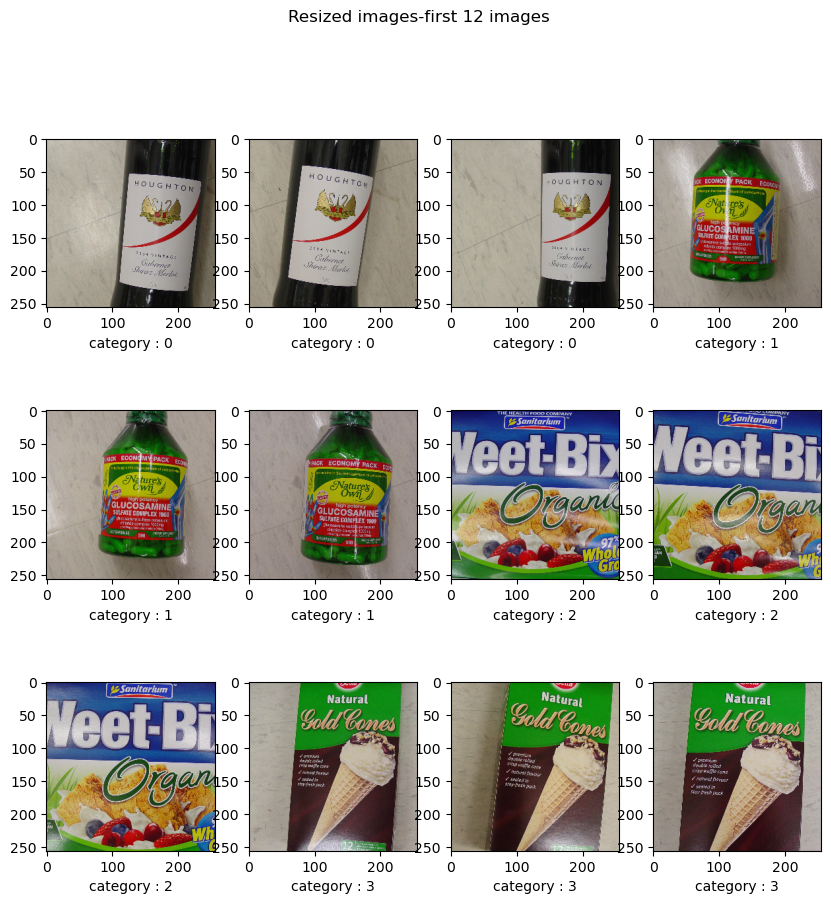

In [58]:
#display first 12 resized images 
fig = plt.figure(figsize=(10,10))
fig.suptitle('Resized images-first 12 images ')
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.imshow(img_list[i])
    plt.xlabel("category : "+label[i])

In [59]:
img_ar = np.array(img_list, dtype = np.float32)
print(img_ar.shape)

(300, 256, 256, 3)


In [60]:
lab_ar = np.array(label, dtype = np.float32)
print(len(lab_ar))

300


In [61]:
pip install imagecorruptions

Note: you may need to restart the kernel to use updated packages.


In [62]:
#normalize the image
def change(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

In [63]:
#image augmentation-pipeline
def img_aug(dataset, label, class_idx=0):
  
    idx_list = np.where(label == class_idx)[0]

    co = imau.pillike.Autocontrast()
    bri = imau.imgcorruptlike.Brightness()
    sha = imau.pillike.EnhanceSharpness()
    rot = imau.Rotate(rotate=(-10, 10), order=1)
    eq = imau.pillike.Equalize()
    ec = imau.pillike.EnhanceColor()
    
    img_list = list(dataset)
    aug_list = img_list
    aug_label_list = list(label)
    
  
    for idx in idx_list:
        img = dataset[idx]

       
        img_aug_list = [co, bri, sha, eq, ec, rot,
            co, bri, sha, eq, ec]
        for aug in img_aug_list:
            img_aug = change(img, 0, 255, np.uint8)
            img_aug = aug.augment_image(img_aug)
            img_aug = change(img_aug, 0, 1, np.float32)
            aug_list.append(img_aug)
            aug_label_list.append(class_idx)

    aug_img_array = np.array(aug_list, dtype=np.float32)
    aug_img_array = aug_img_array - aug_img_array.min()
    aug_label_list_array = np.array(aug_label_list, dtype=np.int32)

    assert aug_img_array.shape[0] == aug_label_list_array.shape[0]

    return aug_img_array, aug_label_list_array


In [64]:
cls_labels = [i for i in range(0,100)]
for i in cls_labels:
    if i==0:
        aug_img, aug_label = img_aug(img_ar, lab_ar, i)
    else:
        aug_img, aug_label = img_aug(aug_img, aug_label, i)

In [65]:
unique, counts = np.unique(aug_label, return_counts=True)
print(dict(zip(unique, counts)))

{0: 36, 1: 36, 2: 36, 3: 36, 4: 36, 5: 36, 6: 36, 7: 36, 8: 36, 9: 36, 10: 36, 11: 36, 12: 36, 13: 36, 14: 36, 15: 36, 16: 36, 17: 36, 18: 36, 19: 36, 20: 36, 21: 36, 22: 36, 23: 36, 24: 36, 25: 36, 26: 36, 27: 36, 28: 36, 29: 36, 30: 36, 31: 36, 32: 36, 33: 36, 34: 36, 35: 36, 36: 36, 37: 36, 38: 36, 39: 36, 40: 36, 41: 36, 42: 36, 43: 36, 44: 36, 45: 36, 46: 36, 47: 36, 48: 36, 49: 36, 50: 36, 51: 36, 52: 36, 53: 36, 54: 36, 55: 36, 56: 36, 57: 36, 58: 36, 59: 36, 60: 36, 61: 36, 62: 36, 63: 36, 64: 36, 65: 36, 66: 36, 67: 36, 68: 36, 69: 36, 70: 36, 71: 36, 72: 36, 73: 36, 74: 36, 75: 36, 76: 36, 77: 36, 78: 36, 79: 36, 80: 36, 81: 36, 82: 36, 83: 36, 84: 36, 85: 36, 86: 36, 87: 36, 88: 36, 89: 36, 90: 36, 91: 36, 92: 36, 93: 36, 94: 36, 95: 36, 96: 36, 97: 36, 98: 36, 99: 36}


In [66]:
print(aug_img.shape)
print(aug_label.shape)

(3600, 256, 256, 3)
(3600,)


In [67]:
print(aug_img.dtype)
print(aug_label.dtype)

float32
int32


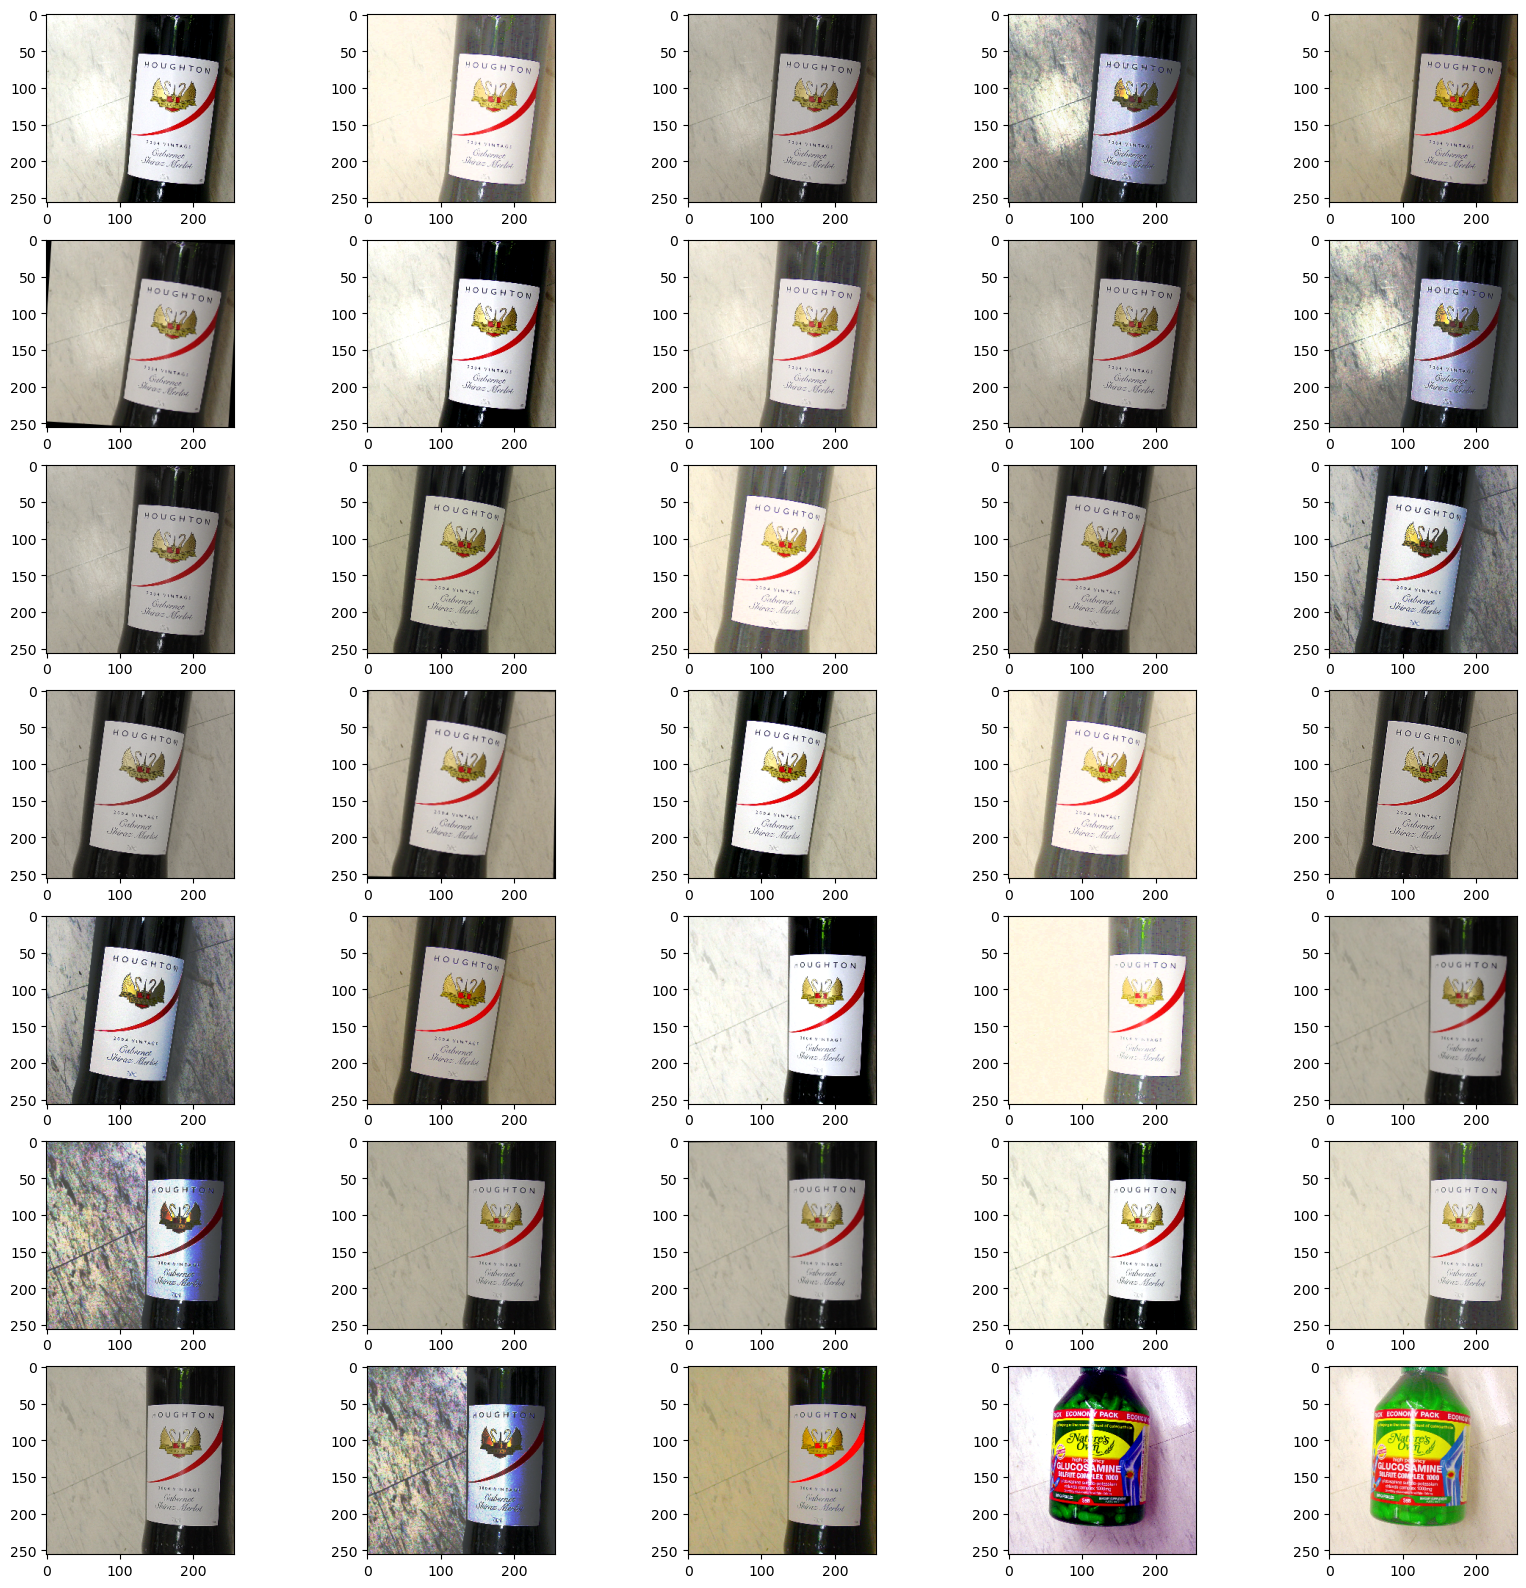

In [224]:
# display 30 augmented images
fig = plt.figure(figsize=(20,20))
for i in range(35):
    fig.add_subplot(7,5,i+1)
    plt.imshow(aug_img[300+i])

In [68]:
#train,validation,test split
from sklearn.model_selection import train_test_split
train_img, test_img, train_label, test_label = train_test_split(aug_img, aug_label,stratify = aug_label, test_size=0.1, shuffle = True, random_state=0)

train_img, val_img, train_label, val_label = train_test_split(train_img, train_label,stratify = train_label, test_size=0.1, shuffle = True, random_state=0)


print("Train", len(train_img))
print("Valid", len(val_img))
print("Test", len(test_img))

Train 2916
Valid 324
Test 360


In [69]:
from tensorflow import keras

In [70]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [71]:
base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
#base_model.summary()
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = keras.layers.Flatten()(x)
predict= keras.layers.Dense(100, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=predict)

In [72]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1=model.fit(train_img, train_label, batch_size=32, epochs=10,verbose=1,validation_data=(val_img, val_label))

Epoch 1/10
92/92 [==============================] - 162s 2s/step - loss: 2.2618 - accuracy: 0.9184 - val_loss: 0.0399 - val_accuracy: 0.9969
Epoch 2/10
92/92 [==============================] - 158s 2s/step - loss: 0.0301 - accuracy: 0.9986 - val_loss: 0.0506 - val_accuracy: 0.9938
Epoch 3/10
92/92 [==============================] - 160s 2s/step - loss: 1.7900e-05 - accuracy: 1.0000 - val_loss: 0.0397 - val_accuracy: 0.9969
Epoch 4/10
92/92 [==============================] - 158s 2s/step - loss: 1.0425e-08 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9969
Epoch 5/10
92/92 [==============================] - 158s 2s/step - loss: 3.9655e-09 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9969
Epoch 6/10
92/92 [==============================] - 164s 2s/step - loss: 3.1887e-09 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9969
Epoch 7/10
92/92 [==============================] - 160s 2s/step - loss: 2.7799e-09 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 

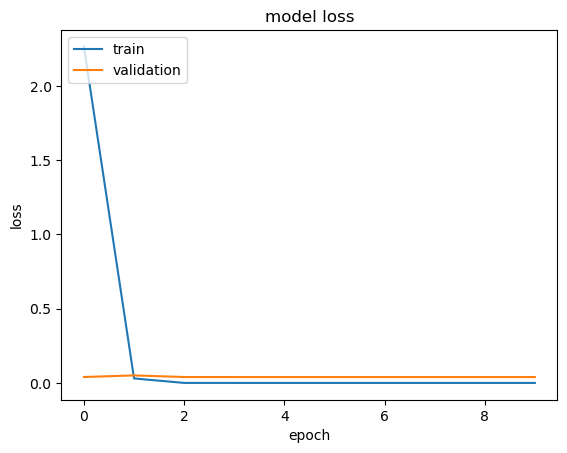

In [73]:
#plot the loss of train and validation set
import matplotlib.pyplot as plt
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(h1)

In [74]:
model.save('model_productdetection'+'.h5')

In [75]:
#evaluationg the model
score = model.evaluate(test_img,test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7783017028705217e-05
Test accuracy: 1.0


In [76]:
#prediction
test_pred = model.predict(test_img)
test_pred = np.argmax(test_pred, 1)
print(test_pred)

12/12 [==============================] - 17s 1s/step
[39 37 12  5 74 20 31 52 52  9 85 69 24 31 81 36 79 29 17 43 92 96 65 56
 20 93 64 99 84 63 35 70 91 24 84 76 19 55 39 51 71 77 45 68 54 42 87 59
 40 69 60 48 85 41 98 21 96 76 47 63 23  0 33 96 48 77 20 39 44 14 88  8
 94 30 37 43 97 78 72 51 16 38 76 32 33 96 93 98 59 82 58  6 99 37 13 44
 55 62 73 65 89 39 67 19 72 94  5 89 57 30 42 88 11  4 38 69 17 27 77 43
 36 70  1 58  1 94  3 92 49 45 59  1 18  2 19 64 42 46 62 12 19 22 90 32
 87 50 41 14 60  9 47 49 81 35  4 35 85 36 25 89 27 91 21 62 66 15 79 89
 64 15 45 55 94 82 50 80 58 86 42 28  3 79 10 10 21 90 93 30 16 47 29 32
 29 32 44 83 63  6  4 51 26 95 95 48  5 97 10 73 34 17 47 57 84 14 86 16
 23 90 24 66 80 57 99 75 18 53  0 46 61 60 56 11 66 34  9 41 18  9 71 28
 82 81 98 13 22 26 61 25  8  1 34 40 87  0  6 77 67 83 46 22 95 15 33 40
 35 85 64 27 50 52 53 79  3 61 92 25 46  7 12  0 14 49 97 71 81 69 25 80
 10 83 98  2 38 29 31 11 74 28 75 91 37 70 15 49 61 57 65 40 59 66 72 7

In [236]:
#confusion metrics
from sklearn import metrics
print(metrics.classification_report(test_label, test_pred, digits=3))
print(metrics.confusion_matrix(test_label, test_pred))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         4
           1      1.000     1.000     1.000         4
           2      1.000     1.000     1.000         3
           3      1.000     1.000     1.000         3
           4      1.000     1.000     1.000         4
           5      1.000     1.000     1.000         4
           6      1.000     1.000     1.000         3
           7      1.000     1.000     1.000         3
           8      1.000     1.000     1.000         3
           9      1.000     1.000     1.000         4
          10      1.000     1.000     1.000         4
          11      1.000     1.000     1.000         4
          12      1.000     1.000     1.000         4
          13      1.000     1.000     1.000         3
          14      1.000     1.000     1.000         4
          15      1.000     1.000     1.000         4
          16      1.000     1.000     1.000         3
          17      1.000    

In [77]:
img_path = [file_ for file_ in natsorted(os.listdir(dir2)) if file_.endswith('.jpg')]
print(len(img_path))

3153


In [78]:
prod_img= [file_ for file_ in natsorted(os.listdir(dir1)) if file_.endswith('.jpg')]
print(len(prod_img))

300


In [79]:
from keras.models import load_model
model_file= r"C:\Users\hp\Machine Learning\Retail_product position\model_productdetection.h5"
model=load_model (model_file)

In [85]:
demo_txt=r"C:\Users\hp\Machine Learning\Retail_product position\Product_Details.txt"

In [82]:
def form_line(id1, id2, x_min, y_min, x_max, y_max):
    line = str(id1)+', '+str(id2)+', '+str(x_min)+', '+str(y_min)+', '+str(x_max)+', '+str(y_max)+ '\n'
    return line

In [83]:
from tqdm import tqdm

In [86]:
sol_1 = ''
sol_2 =''

for f in tqdm(img_path):
    sh_img = os.path.join(dir2, f)
    img_shape = np.flip(np.array(plt.imread(sh_img).shape[:2]))
    img = plt.imread(sh_img)
    with open(demo_txt, 'r') as fi:
            next(fi)
            for line in fi.readlines():
                values = line.strip().split(',')
                (xn,yn,wn,hn) = map(float, values[-4:])
               
                x = int(float(xn)*(img_shape[0]))
                y = int(float(yn)*(img_shape[1]))
                w = int(float(wn)*(img_shape[0]))
                h = int(float(hn)*(img_shape[1]))
      
                x1 = int(x - (w/2))
                y1 = int(y - (h/2))
                
                img_ = np.array(img[y1:y1+h, x1:x1+w])

                
                if img_.shape[0] > 0 and img_.shape[1] > 0:
                    img_res = tf.keras.preprocessing.image.smart_resize(img_, size=(256,256), interpolation='bicubic')
                    img_res = img_res - img_res.min()
                    img_res = img_res/(img_res.max() - img_res.min())
                    img_res = np.expand_dims(img_res, axis = 0)
                else:
                    print("Invalid image size")
                    continue
                    

      
                y_pred = model.predict(img_res)
                y_pred = np.argmax(y_pred, 1)
      
             
                x_min = x1
                y_min = y1
                x_max = x1 + w
                y_max = y1 + h
                
                id = (f.split('.jpg')[0]).split('db')[1] 
                sol_1 += form_line(y_pred[0], id, x_min, y_min, x_max, y_max)

  0%|                                                                                         | 0/3153 [00:00<?, ?it/s]

1/1 [==============================] - 0s 105ms/step
Invalid image size
1/1 [==============================] - 0s 98ms/step
Invalid image size
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 103ms/step


  0%|                                                                              | 1/3153 [00:34<29:48:05, 34.04s/it]

1/1 [==============================] - 0s 95ms/step
Invalid image size
1/1 [==============================] - 0s 93ms/step
Invalid image size
1/1 [==============================] - 0s 106ms/step


  0%|                                                                              | 2/3153 [01:04<27:43:23, 31.67s/it]

1/1 [==============================] - 0s 111ms/step
Invalid image size
1/1 [==============================] - 0s 108ms/step
Invalid image size
1/1 [==============================] - 0s 106ms/step


  0%|                                                                              | 3/3153 [01:34<27:21:31, 31.27s/it]

1/1 [==============================] - 0s 118ms/step
Invalid image size
1/1 [==============================] - 0s 98ms/step
Invalid image size
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 99ms/step


  0%|                                                                              | 4/3153 [02:05<27:13:27, 31.12s/it]

1/1 [==============================] - 0s 96ms/step
Invalid image size
1/1 [==============================] - 0s 104ms/step
Invalid image size
1/1 [==============================] - 0s 103ms/step


  0%|                                                                              | 5/3153 [02:37<27:20:39, 31.27s/it]

1/1 [==============================] - 0s 104ms/step
Invalid image size
1/1 [==============================] - 0s 110ms/step
Invalid image size
1/1 [==============================] - 0s 130ms/step


  0%|▏                                                                             | 6/3153 [03:09<27:43:48, 31.72s/it]

1/1 [==============================] - 0s 115ms/step


  0%|▏                                                                             | 6/3153 [03:19<29:07:34, 33.32s/it]


KeyboardInterrupt: 

In [87]:
soln_1_path =r"C:\Users\hp\Machine Learning\Retail_product position\solution_.txt"
if not os.path.isfile(soln_1_path):
    f_1 = open(soln_1_path, 'x')
    f_1.close()

with open(soln_1_path, 'w') as s1:
    s1.write(sol_1)